In [1]:
import pandas as pd
import numpy as np
import tweepy 
import requests
import json
from timeit import default_timer as timer
from tweepy import OAuthHandler
import matplotlib.pyplot as plt

In [2]:
archivedf = pd.read_csv('twitter_archive_enhanced.csv', sep = ',')

In [3]:
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)

with open('image_predictions.tsv', 'wb')as f:
    f.write(response.content)

In [4]:
imagedf = pd.read_csv('image_predictions.tsv', sep = "\t")

In [5]:
consumer_key = 'X4Brx0KqE3BHMhfM7klRQzGb5'
consumer_secret = '8KBd6D3cjoNH02Iv3SQuyZDY62xxIjO6qFHI0C3msHBCslg4H9'
access_token = '901126343823327234-k6ITYAZnJsAwHqSpc8z4aTTfEhiM6bt'
access_secret = 'GZaqeDQ3Vxy6GiNIhZavJIJ5QveLSkM4BbUHeaWWMmj9j'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

In [6]:
tweet_ids = archivedf.tweet_id.values
len(tweet_ids)

2356

In [7]:
count = 0
fails_dict = {}
start = timer()
with open('tweet_json.txt', 'w') as outfile:
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

1: 892420643555336193
Success
2: 892177421306343426
Success
3: 891815181378084864
Success
4: 891689557279858688
Fail
5: 891327558926688256
Success
6: 891087950875897856
Success
7: 890971913173991426
Success
8: 890729181411237888
Success
9: 890609185150312448
Success
10: 890240255349198849
Fail
11: 890006608113172480
Success
12: 889880896479866881
Success
13: 889665388333682689
Success
14: 889638837579907072
Success
15: 889531135344209921
Success
16: 889278841981685760
Success
17: 888917238123831296
Success
18: 888804989199671297
Success
19: 888554962724278272
Success
20: 888202515573088257
Fail
21: 888078434458587136
Success
22: 887705289381826560
Success
23: 887517139158093824
Success
24: 887473957103951883
Success
25: 887343217045368832
Success
26: 887101392804085760
Success
27: 886983233522544640
Success
28: 886736880519319552
Success
29: 886680336477933568
Success
30: 886366144734445568
Success
31: 886267009285017600
Success
32: 886258384151887873
Fail
33: 886054160059072513
Succes

In [8]:
tweetdf = pd.DataFrame(columns=['tweet_id', 'retweet_count','favorite_count'])

with open('tweet_json.txt') as f:
    for line in f:
        status = json.loads(line)
        tweet_id = status['id_str']
        retweet_count = status['retweet_count']
        favorite_count = status['favorite_count']
        
        tweetdf = tweetdf.append(pd.DataFrame([[tweet_id, retweet_count, favorite_count]], 
                                       columns = ['tweet_id', 'retweet_count', 'favorite_count']))
tweetdf = tweetdf.reset_index(drop = True)
tweetdf.sample(3)

,tweet_id,retweet_count,favorite_count
305,831650051525054464,2064,7474
1151,708738143638450176,853,2833
713,772877495989305348,4146,8998




## Assessing Data

#### Inspecting for data quality and tidiness

In [9]:
archivedf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [10]:
archivedf.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [11]:
archivedf.tail()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


In [12]:
archivedf.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [13]:
archivedf.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [14]:
imagedf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [15]:
imagedf.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [16]:
imagedf.tail()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


In [17]:
imagedf.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [18]:
tweetdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2145 entries, 0 to 2144
Data columns (total 3 columns):
tweet_id          2145 non-null object
retweet_count     2145 non-null object
favorite_count    2145 non-null object
dtypes: object(3)
memory usage: 50.4+ KB


In [19]:
tweetdf.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8190,37553
1,892177421306343426,6058,32281
2,891815181378084864,4008,24318
3,891327558926688256,9038,39100
4,891087950875897856,3002,19661


In [20]:
tweetdf.tail()

,tweet_id,retweet_count,favorite_count
2140,666051853826850816,826,1188
2141,666050758794694657,56,129
2142,666049248165822465,41,104
2143,666033412701032449,43,120
2144,666029285002620928,46,124


In [21]:
tweetdf.isnull().sum()

tweet_id          0
retweet_count     0
favorite_count    0
dtype: int64




## Issues

### Quality

1.twitter_archive table had some columns have missing values,  "in_reply_to_status_id", "in_reply_to_user_id", "retweeted_status_id", "in_reply_to_user_id", "retweeted_status_id", "retweeted_status_user_id", "retweeted_status_timestamp".

2.tweet table had retweet_count and favorite_count should be an integer, its shown to be an object

3.In twitter_archive table , Some names are incorrect.

4.Column headers are not clear in image table.

5.The datatype of "timestamp" in twitter_archive table is object , its should have be datetime.  

6.Some names in twitter_archive table start with lowercase letters.



### Tideness

1.Columns 'doggo', 'floofer', 'pupper', 'puppo'  in tweet table should be in 1 column.

2.The tweet table need to merge into the twitter_archive table.



## Clean

In [22]:
archivecopy = archivedf.copy()
imagecopy = imagedf.copy()
tweetcopy = tweetdf.copy()



## Quality Issues


### Issue 1 
#### Define
twitter_archive table had some columns have huge amount of missing values,  "in_reply_to_status_id", "in_reply_to_user_id", "retweeted_status_id", "retweeted_status_user_id", "retweeted_status_timestamp"

### Code



In [23]:
archivecopy.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None


In [24]:
archivedf.retweeted_status_id.isnull().sum()

2175

In [25]:
archivedf.retweeted_status_user_id.isnull().sum()

2175

In [26]:
archivedf.retweeted_status_timestamp.isnull().sum()

2175

In [27]:
archivedf.in_reply_to_status_id.isnull().sum()

2278

In [28]:
archivedf.in_reply_to_user_id.isnull().sum()

2278

In [29]:
columnsdrop = ['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'in_reply_to_status_id',
               'in_reply_to_user_id' ]

archivecopy = archivecopy.drop(columnsdrop, axis = 1)



### test



In [30]:
archivecopy.head(1)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None






###  Issue 2
#### Define

tweet table had retweet_count and favorite_count should be an integer, its shown to be an object

#### Code



In [31]:
tweetcopy.retweet_count = tweetcopy.retweet_count.astype(int)
tweetcopy.favorite_count = tweetcopy.favorite_count.astype(int)



#### test

In [32]:
tweetcopy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2145 entries, 0 to 2144
Data columns (total 3 columns):
tweet_id          2145 non-null object
retweet_count     2145 non-null int32
favorite_count    2145 non-null int32
dtypes: int32(2), object(1)
memory usage: 33.6+ KB






### Issue 3 
#### Define
In twitter_archive table , Some names are incorrect

#### Code



In [33]:
archivecopy['name'].value_counts().head(20)

None       745
a           55
Charlie     12
Cooper      11
Lucy        11
Oliver      11
Lola        10
Tucker      10
Penny       10
Bo           9
Winston      9
the          8
Sadie        8
Toby         7
Daisy        7
Buddy        7
an           7
Bailey       7
Koda         6
Jax          6
Name: name, dtype: int64

In [34]:
notcorrectname = ['a','the','an']
for i in notcorrectname:
        archivecopy['name'].replace(i, 'None', inplace=True)



#### test

In [35]:
archivecopy['name'].value_counts().head(20)

None       815
Charlie     12
Lucy        11
Oliver      11
Cooper      11
Tucker      10
Penny       10
Lola        10
Bo           9
Winston      9
Sadie        8
Toby         7
Daisy        7
Buddy        7
Bailey       7
Milo         6
Jack         6
Koda         6
Oscar        6
Stanley      6
Name: name, dtype: int64





###  Issue 4
#### Define
Column headers are not clear in image table

#### Code



In [36]:
imagecopy.head(2)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True


In [37]:
imagecopy = imagecopy.rename(columns = {'img_num':'imagenumber', 'p1': 'prediction1','p1_conf':'prediction1confidence',
                        'p1_dog':'prediction1dog','p2': 'prediction2','p2_conf':'prediction2confidence',
                        'p2_dog':'prediction2dog','p3': 'prediction3','p3_conf':'prediction3confidence','p3_dog':'prediction3dog'})



#### test 

In [38]:
imagecopy.head(2)

,tweet_id,jpg_url,imagenumber,prediction1,prediction1confidence,prediction1dog,prediction2,prediction2confidence,prediction2dog,prediction3,prediction3confidence,prediction3dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True




###  Issue 5
#### Define
The datatype of "timestamp" in twitter_archive table is object , its should have be datetime.

#### Code

In [39]:
archivecopy['timestamp'] = pd.to_datetime(archivecopy['timestamp'])



#### test

In [40]:
archivecopy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2356 non-null int64
timestamp             2356 non-null datetime64[ns]
source                2356 non-null object
text                  2356 non-null object
expanded_urls         2297 non-null object
rating_numerator      2356 non-null int64
rating_denominator    2356 non-null int64
name                  2356 non-null object
doggo                 2356 non-null object
floofer               2356 non-null object
pupper                2356 non-null object
puppo                 2356 non-null object
dtypes: datetime64[ns](1), int64(3), object(8)
memory usage: 221.0+ KB




###  Issue 6
#### Define
Some names in twitter_archive table start with lowercase letters


#### Code



In [41]:
archivecopy['name'].str.islower().sum()

39

In [42]:
archivecopy['name'] = archivecopy.name.str.capitalize()



#### test



In [43]:
archivecopy['name'].str.islower().sum()

0





## Tideness Issue

###  Issue 1¶
#### Define

Columns 'doggo', 'floofer', 'pupper', 'puppo'  in tweet table should be in 1 column.


#### Code

In [44]:
archivecopy.head(2)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None


In [45]:
stage = ['doggo', 'floofer' , 'pupper', 'puppo' ]
for i in stage:
        archivecopy[i] =  archivecopy[i].replace('None', '')

In [46]:
archivecopy['stage'] =  archivecopy.doggo+ archivecopy.floofer+ archivecopy.pupper+ archivecopy.puppo

In [47]:
archivecopy = archivecopy.drop(['doggo','floofer','pupper','puppo'], axis = 1)

archivecopy['stage'] = archivecopy['stage'].replace('', np.nan)

#### test

In [48]:
archivecopy.head(2)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN






###  Issue 2
#### Define
The tweet table need to merge into the twitter_archive table

#### Code



In [49]:
tweetcopy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2145 entries, 0 to 2144
Data columns (total 3 columns):
tweet_id          2145 non-null object
retweet_count     2145 non-null int32
favorite_count    2145 non-null int32
dtypes: int32(2), object(1)
memory usage: 33.6+ KB


In [50]:
archivecopy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 9 columns):
tweet_id              2356 non-null int64
timestamp             2356 non-null datetime64[ns]
source                2356 non-null object
text                  2356 non-null object
expanded_urls         2297 non-null object
rating_numerator      2356 non-null int64
rating_denominator    2356 non-null int64
name                  2356 non-null object
stage                 380 non-null object
dtypes: datetime64[ns](1), int64(3), object(5)
memory usage: 165.7+ KB


In [52]:
archivecopy2 = archivecopy.copy()
imagecopy2 = imagecopy.copy()
tweetcopy2 = tweetcopy.copy()

In [64]:
archivecopy2['tweet_id'] = archivecopy2['tweet_id'].astype('str')
imagecopy2['tweet_id'] = imagecopy2['tweet_id'].astype('str')
tweetcopy2['tweet_id'] = tweetcopy2['tweet_id'].astype('str')

In [93]:
master = pd.merge(archivecopy2, imagecopy2, on ='tweet_id', how= 'inner' )
master = pd.merge(master, tweetcopy2, on = 'tweet_id', how = 'inner' )

In [94]:
master.tweet_id.count()

1900



## Store

Saving  to the csv file

In [95]:
master.to_csv('twitter_archive_master.csv', index = False)



### Basic Analysis and Visulizations



In [96]:
master.sample()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage,jpg_url,...,prediction1confidence,prediction1dog,prediction2,prediction2confidence,prediction2dog,prediction3,prediction3confidence,prediction3dog,retweet_count,favorite_count
136,856526610513747968,2017-04-24 15:13:52,"<a href=""http://twitter.com/download/iphone"" r...","THIS IS CHARLIE, MARK. HE DID JUST WANT TO SAY...",https://twitter.com/dog_rates/status/856526610...,14,10,None,NaN,https://pbs.twimg.com/media/C-L-aIYXgAIR0jY.jpg,...,0.798481,True,Tibetan_terrier,0.060602,True,standard_poodle,0.040722,True,1908,11871


In [97]:
dogfavorites = master.groupby('prediction1')['favorite_count'].sum().sort_values(ascending=False).head(8)
dogfavorites

prediction1
golden_retriever      1566794
Labrador_retriever     989476
Pembroke               832364
Chihuahua              491493
French_bulldog         452713
Samoyed                417993
chow                   368032
cocker_spaniel         298926
Name: favorite_count, dtype: int32

In [98]:
dogretweets = master.groupby('prediction1')['retweet_count'].sum().sort_values(ascending=False).head(8)
dogretweets

prediction1
golden_retriever      524063
Labrador_retriever    346908
Pembroke              229822
Samoyed               164312
Chihuahua             158529
cocker_spaniel        114213
French_bulldog        113502
chow                  111378
Name: retweet_count, dtype: int32

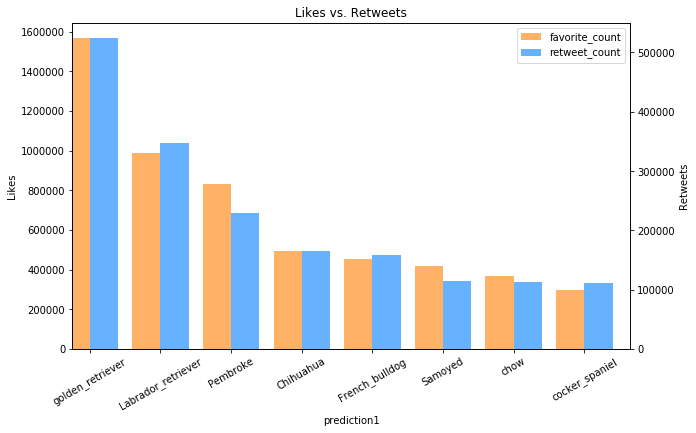

<Figure size 432x288 with 0 Axes>

In [99]:
%matplotlib inline
fig = plt.figure() 

ax = fig.add_subplot(111) 
ax2 = ax.twinx() 

width = 0.4

dogfavorites.plot(figsize = (10,6), kind='bar', color='#FFB266', ax=ax, width=width, position=1, title='Likes vs. Retweets')
dogretweets.plot(figsize = (10,6), kind='bar', color='#66B2FF', ax=ax2, width=width, position=0)

ax.grid(False)

ax2.grid(False)

ax.set_ylabel('Likes')
ax2.set_ylabel('Retweets')

ax.set_xticklabels(dog_favorites.index, rotation=30)

h1, l1 = ax.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()

plt.legend(h1+h2, l1+l2, loc=1)
plt.show()
plt.savefig('Popular_Breeds.png')

In [103]:
nullnames = ['name']

for name in nullnames:
    master.loc[master[name] == 'None', name] = None

In [114]:
master['source'] = master['source'].replace('<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
                                                                          'Twitter for iphone')
master['source'] = master['source'].replace('<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>',
                                                                          'Vine')
master['source'] = master['source'].replace('<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
                                                                           'Twitter Web Client')
master['source'] = master['source'].replace('<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>',
                                                                           'TweetDeck')

In [117]:
sourcescount = master['source'].value_counts().head(10)
sourcescount

Twitter for iphone    1860
Twitter Web Client      30
TweetDeck               10
Name: source, dtype: int64

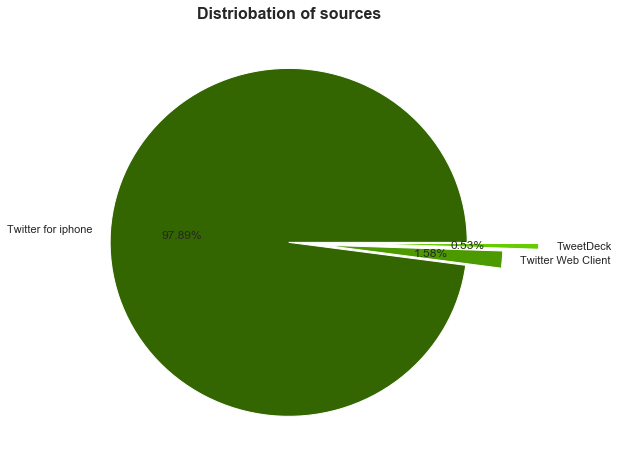

In [118]:
explode = np.linspace(0,0.4,3)
colors = ['#336600', '#4C9900', '#66CC00']
sourcescount.sort_values(ascending=False).plot.pie(legend=False, subplots=True, autopct='%.2f%%', figsize=(8,8), explode=explode,colors = colors)
plt.ylabel('')
plt.title('Distriobation of sources', weight='bold', fontsize=16)
plt.savefig('sources.png')